In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree
from graphviz import Source as src
from sklearn.tree import DecisionTreeClassifier as dtc

In [2]:
# Read CSV file
csv_data = pd.read_csv("RAM_Benchmarks_megalist.csv")

# The columns we re interested in
interested_cols = ["gen","latency","readUncached","write","price"]

# Create dataset with the columns
dataset = csv_data[interested_cols]

# Remove empty columns
for col in interested_cols:
    dataset = dataset[dataset[col].notna()]

# reset index cause we removed columns
dataset.reset_index(inplace=True, drop=True)

# Change "gen" from string to numeric method
def change_gen_data(x):
    if x=="DDR5":
        return 3
    elif x=="DDR4":
        return 2
    elif x=="DDR3":
        return 1
    elif x=="DDR2":
        return 0
# apply method
dataset.loc[:,"gen"] = dataset.loc[:,"gen"].apply(change_gen_data)

# Change string to float
def change_to_float(x):
    return float(x.replace(',', ''))
# apply method
dataset.loc[:,"readUncached"] = dataset.loc[:,"readUncached"].apply(change_to_float)
dataset.loc[:,"write"] = dataset.loc[:,"write"].apply(change_to_float)

dataset.head()

,gen,latency,readUncached,write,price
0,3,31,19500.0,16700.0,909.98
1,3,42,19400.0,16300.0,627.98
2,3,32,17400.0,15000.0,559.00
3,3,31,16800.0,14700.0,499.00
4,3,30,16400.0,14400.0,699.00


In [3]:
dataset

,gen,latency,readUncached,write,price
0,3,31,19500.0,16700.0,909.98
1,3,42,19400.0,16300.0,627.98
2,3,32,17400.0,15000.0,559.00
3,3,31,16800.0,14700.0,499.00
4,3,30,16400.0,14400.0,699.00
...,...,...,...,...,...
1451,0,65,2664.8,1132.2,18.99
1452,0,64,2406.0,1120.5,13.99
1453,0,90,1495.5,1106.6,21.17
1454,0,86,1761.9,895.9,13.99


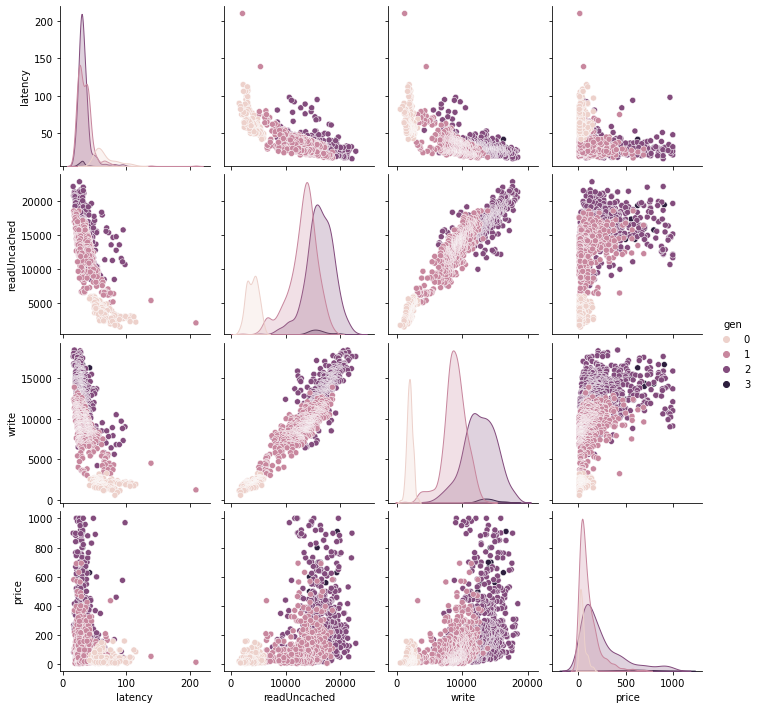

In [4]:
# pair plot to check the data to ensure something did not go missing....
sb.pairplot(dataset,hue="gen")
plt.show()

In [5]:
# x contains eveything but gen
x_data = dataset.iloc[:,1:]
# y contains gen only
y_data = dataset.iloc[:,0]

# randomize x and y test and train data
x_train, x_test, y_train, y_test = tts(x_data,y_data, random_state=204)


print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

      latency  readUncached    write   price
582        33       15600.0  10000.0   63.99
1420       56        3822.7   1675.5   18.00
1354      107        3129.8   2121.8   42.00
848        37       13300.0   9800.0   69.99
1190       43       12100.0   7600.0   34.00
...       ...           ...      ...     ...
604        42       15200.0   9500.0   97.89
538        38       13600.0  10700.0   68.99
1293       75        5100.0   4000.0   43.91
245        22       17600.0  13700.0  169.99
1089       30       11800.0   8300.0   76.99

[1092 rows x 4 columns]

      latency  readUncached    write   price
893        37       13800.0   9400.0   76.00
384        32       16500.0  12200.0   36.99
1345       50        4965.8   2198.4   38.70
261        28       18300.0  13500.0   59.99
208        30       17900.0  14100.0  169.99
...       ...           ...      ...     ...
957        28       13300.0   9100.0  389.99
1299       31        6600.0   3600.0   30.75
413        33       15900.0  

In [6]:
# generate a DecisionTreeClassifier model and train it with train data
dt = dtc(max_depth = 4, random_state = 204)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=204)

In [7]:
# predict y with x_test data
y_pred = dt.predict(x_test)

In [8]:
# print accuracy
acc(y_test, y_pred)

0.9203296703296703

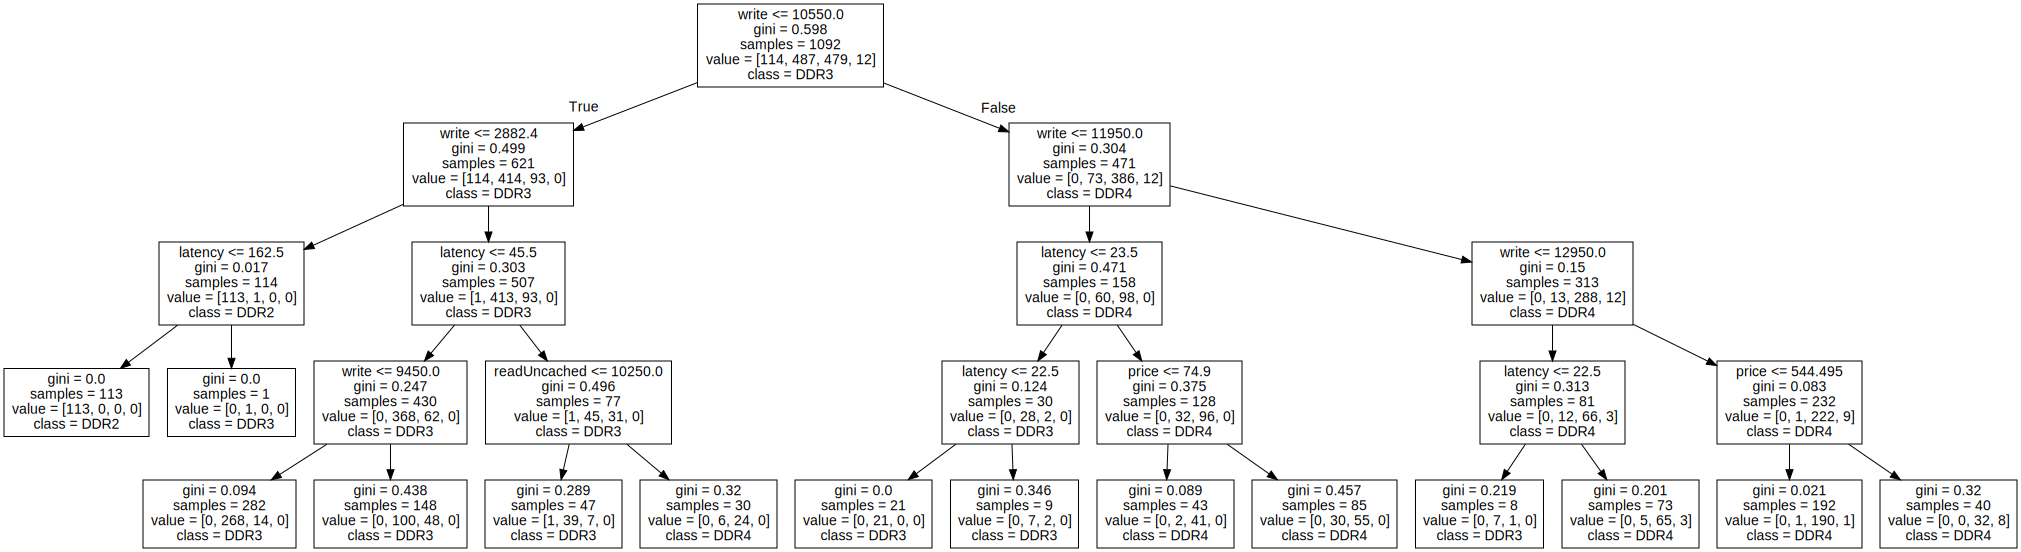

In [9]:
# Draw out the decission tree
src(tree.export_graphviz(dt, out_file=None, class_names=["DDR2", "DDR3","DDR4","DDR5"], feature_names= x_train.columns)) # display the tree, with no output file

In [10]:
max_accuracy = 0
temp = ""

for rand in range(0,300):
    x_train, x_test, y_train, y_test = tts(x_data,y_data, random_state=rand)

    for n in range(1,30):
        dt = dtc(max_depth = n, random_state = rand)
        dt.fit(x_train, y_train)
        y_pred = dt.predict(x_test)
        accuracy = acc(y_test,y_pred)
        if(max_accuracy < accuracy):
            max_accuracy = accuracy
            temp = "When rand: :", rand," n: ",n, " acc: ", accuracy
        print("When rand: :", rand," n: ",n, " acc: ", accuracy)
    
print()
print()
print(temp)

When rand: : 0  n:  1  acc:  0.6813186813186813
When rand: : 0  n:  2  acc:  0.7884615384615384
When rand: : 0  n:  3  acc:  0.7912087912087912
When rand: : 0  n:  4  acc:  0.8489010989010989
When rand: : 0  n:  5  acc:  0.8736263736263736
When rand: : 0  n:  6  acc:  0.8708791208791209
When rand: : 0  n:  7  acc:  0.8571428571428571
When rand: : 0  n:  8  acc:  0.8598901098901099
When rand: : 0  n:  9  acc:  0.8434065934065934
When rand: : 0  n:  10  acc:  0.8296703296703297
When rand: : 0  n:  11  acc:  0.8296703296703297
When rand: : 0  n:  12  acc:  0.8186813186813187
When rand: : 0  n:  13  acc:  0.8104395604395604
When rand: : 0  n:  14  acc:  0.8076923076923077
When rand: : 0  n:  15  acc:  0.8104395604395604
When rand: : 0  n:  16  acc:  0.8214285714285714
When rand: : 0  n:  17  acc:  0.8076923076923077
When rand: : 0  n:  18  acc:  0.8076923076923077
When rand: : 0  n:  19  acc:  0.8076923076923077
When rand: : 0  n:  20  acc:  0.8076923076923077
When rand: : 0  n:  21  acc: 